In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
from datetime import datetime

In [3]:
data = pd.read_csv(r"C:\Users\44776\Documents\PYTHON\Traffic\traffic_index.csv")

In [4]:
data.head()

,trafficindexdate,minimum_traffic_index,maximum_traffic_index,average_traffic_index
0,2022-08-14 00:00:00 +0000 +0000,1,38,17.551854
1,2016-09-23 00:00:00 +0000 +0000,2,76,36.892361
2,2019-03-31 00:00:00 +0000 +0000,1,18,4.699301
3,2024-06-13 00:00:00 +0000 +0000,1,81,43.719801
4,2019-01-12 00:00:00 +0000 +0000,6,54,28.329825


In [5]:
data['trafficindexdate'] = pd.to_datetime(data['trafficindexdate'])


In [6]:
data['date_only'] = data['trafficindexdate'].dt.date  # Extract the date part


In [7]:
data.head()

,trafficindexdate,minimum_traffic_index,maximum_traffic_index,average_traffic_index,date_only
0,2022-08-14 00:00:00+00:00,1,38,17.551854,2022-08-14
1,2016-09-23 00:00:00+00:00,2,76,36.892361,2016-09-23
2,2019-03-31 00:00:00+00:00,1,18,4.699301,2019-03-31
3,2024-06-13 00:00:00+00:00,1,81,43.719801,2024-06-13
4,2019-01-12 00:00:00+00:00,6,54,28.329825,2019-01-12


In [8]:

#data = data.drop('trafficindexdate', axis=1)

In [9]:
data.head(5)


,trafficindexdate,minimum_traffic_index,maximum_traffic_index,average_traffic_index,date_only
0,2022-08-14 00:00:00+00:00,1,38,17.551854,2022-08-14
1,2016-09-23 00:00:00+00:00,2,76,36.892361,2016-09-23
2,2019-03-31 00:00:00+00:00,1,18,4.699301,2019-03-31
3,2024-06-13 00:00:00+00:00,1,81,43.719801,2024-06-13
4,2019-01-12 00:00:00+00:00,6,54,28.329825,2019-01-12


In [10]:
data = data.dropna()

In [11]:
#print(data.isnull().sum())

In [12]:
data.head()

,trafficindexdate,minimum_traffic_index,maximum_traffic_index,average_traffic_index,date_only
0,2022-08-14 00:00:00+00:00,1,38,17.551854,2022-08-14
1,2016-09-23 00:00:00+00:00,2,76,36.892361,2016-09-23
2,2019-03-31 00:00:00+00:00,1,18,4.699301,2019-03-31
3,2024-06-13 00:00:00+00:00,1,81,43.719801,2024-06-13
4,2019-01-12 00:00:00+00:00,6,54,28.329825,2019-01-12


In [13]:
# Calculate overall min, max, and average traffic index
min_traffic_index = data['average_traffic_index'].min()
max_traffic_index = data['average_traffic_index'].max()
avg_traffic_index = data['average_traffic_index'].mean()

In [14]:
# Analyze traffic index by date
traffic_by_date = data.groupby('date_only')['average_traffic_index'].agg(['min', 'max', 'mean']).reset_index()
print("\nTraffic Index Analysis by Date:")
print(traffic_by_date)


Traffic Index Analysis by Date:
       date_only        min        max       mean
0     2015-08-06  57.858116  57.858116  57.858116
1     2015-08-07  23.770492  23.770492  23.770492
2     2015-08-11  38.601266  38.601266  38.601266
3     2015-08-12  29.715278  29.715278  29.715278
4     2015-08-13  28.557491  28.557491  28.557491
...          ...        ...        ...        ...
3283  2024-08-31  23.124147  23.124147  23.124147
3284  2024-09-01  22.230028  22.230028  22.230028
3285  2024-09-02  30.803468  30.803468  30.803468
3286  2024-09-03  35.275204  35.275204  35.275204
3287  2024-09-04   4.170068   4.170068   4.170068

[3288 rows x 4 columns]


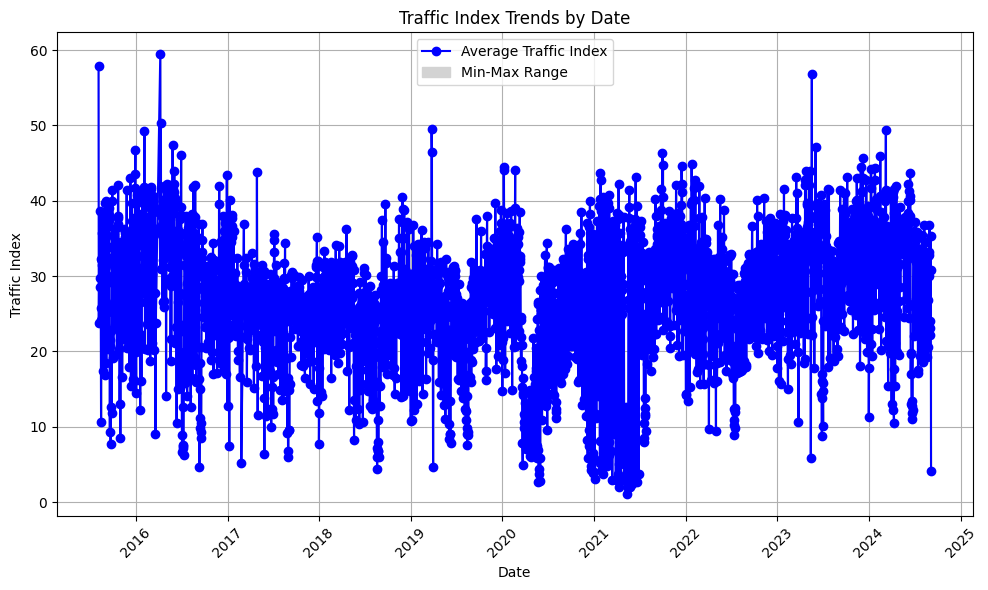

In [17]:
plt.figure(figsize=(10,6))
plt.plot(traffic_by_date['date_only'], traffic_by_date['mean'], marker='o', color='b', label='Average Traffic Index')
plt.fill_between(traffic_by_date['date_only'], traffic_by_date['min'], traffic_by_date['max'], color='lightgray', label='Min-Max Range')
plt.title('Traffic Index Trends by Date')
plt.xlabel('Date')
plt.ylabel('Traffic Index')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Train the ARIMA model
model = ARIMA(traffic_by_date['mean'], order=(1, 1, 1))  # Example order
model_fit = model.fit()

In [22]:
# Make predictions
forecast = model_fit.forecast(steps=7)  # Forecast next 7 days

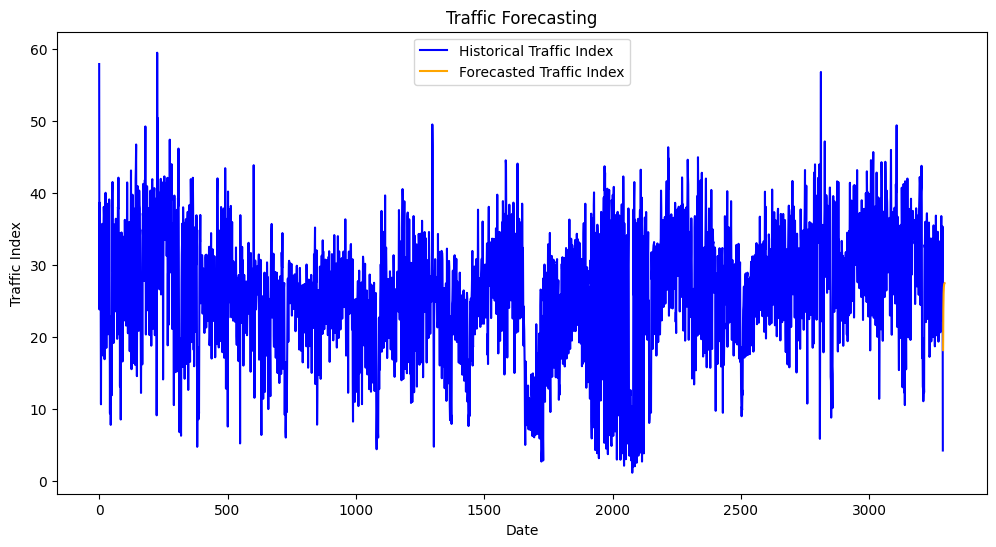

In [23]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(traffic_by_date['mean'], label='Historical Traffic Index', color='blue')
plt.plot(forecast, label='Forecasted Traffic Index', color='orange')
plt.title('Traffic Forecasting')
plt.xlabel('Date')
plt.ylabel('Traffic Index')
plt.legend()
plt.show()

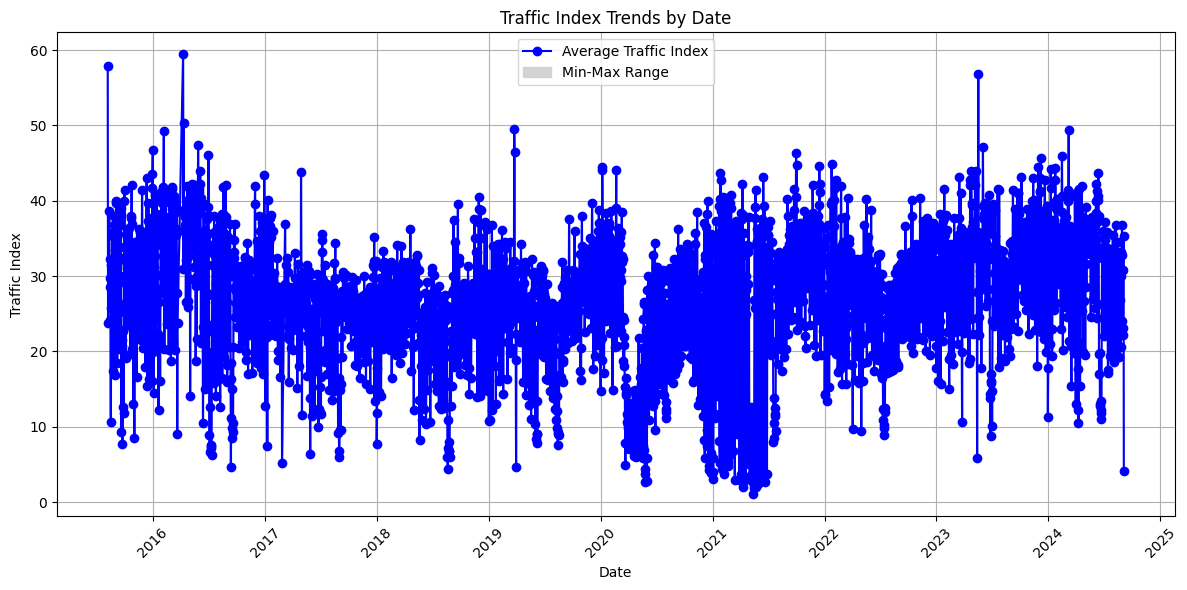

In [24]:
# Plot traffic trends over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_by_date['date_only'], traffic_by_date['mean'], marker='o', color='blue', label='Average Traffic Index')
plt.fill_between(traffic_by_date['date_only'], traffic_by_date['min'], traffic_by_date['max'], color='lightgray', label='Min-Max Range')
plt.title('Traffic Index Trends by Date')
plt.xlabel('Date')
plt.ylabel('Traffic Index')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Prepare the dataset for modeling
# Aggregate data by date
#traffic_by_date = data.groupby('date_only')['Average Traffic Index'].agg(['mean']).reset_index()
traffic_by_date['date_only'] = pd.to_datetime(traffic_by_date['date_only'])
traffic_by_date['day_of_week'] = traffic_by_date['date_only'].dt.dayofweek  # 0=Monday, 6=Sunday
traffic_by_date['day'] = traffic_by_date['date_only'].dt.day
traffic_by_date['month'] = traffic_by_date['date_only'].dt.month


In [30]:
traffic_by_date

,date_only,min,max,mean,day_of_week,day,month
0,2015-08-06,57.858116,57.858116,57.858116,3,6,8
1,2015-08-07,23.770492,23.770492,23.770492,4,7,8
2,2015-08-11,38.601266,38.601266,38.601266,1,11,8
3,2015-08-12,29.715278,29.715278,29.715278,2,12,8
4,2015-08-13,28.557491,28.557491,28.557491,3,13,8
...,...,...,...,...,...,...,...
3283,2024-08-31,23.124147,23.124147,23.124147,5,31,8
3284,2024-09-01,22.230028,22.230028,22.230028,6,1,9
3285,2024-09-02,30.803468,30.803468,30.803468,0,2,9
3286,2024-09-03,35.275204,35.275204,35.275204,1,3,9


In [31]:
# Prepare features and target variable
X = traffic_by_date[['day_of_week', 'day', 'month']]
y = traffic_by_date['mean']

In [33]:
y

0       57.858116
1       23.770492
2       38.601266
3       29.715278
4       28.557491
          ...    
3283    23.124147
3284    22.230028
3285    30.803468
3286    35.275204
3287     4.170068
Name: mean, Length: 3288, dtype: float64

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Initialize and train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)


In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 43.75372126716547


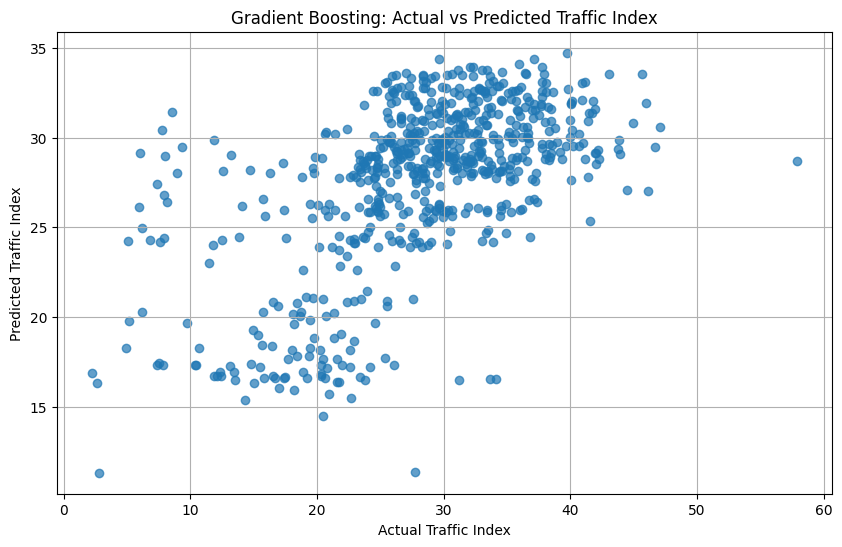

In [38]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Traffic Index')
plt.ylabel('Predicted Traffic Index')
plt.title('Gradient Boosting: Actual vs Predicted Traffic Index')
plt.grid(True)
plt.show()

In [41]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Make predictions
y_rf_pred = rf_model.predict(X_test)

In [44]:
# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
print("Random Forest Mean Squared Error:", rf_mse)

Random Forest Mean Squared Error: 60.59313636061255


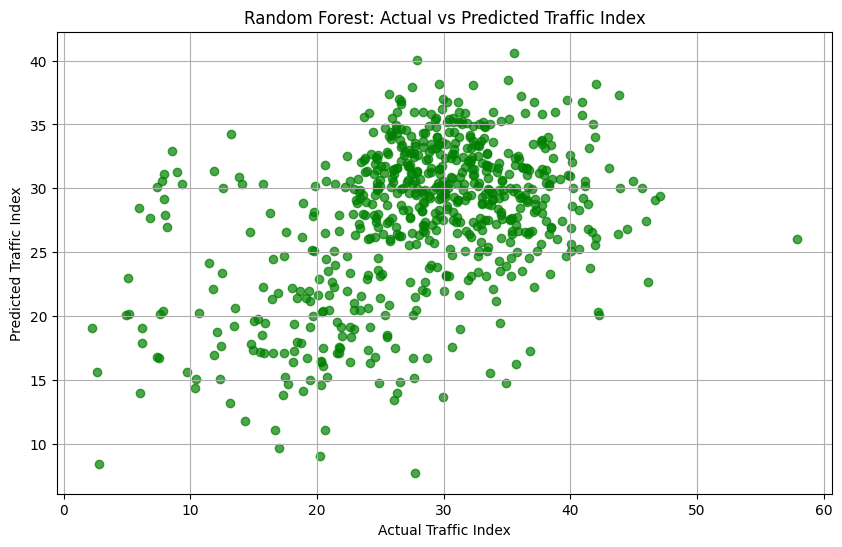

In [45]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.7, color='green')
plt.xlabel('Actual Traffic Index')
plt.ylabel('Predicted Traffic Index')
plt.title('Random Forest: Actual vs Predicted Traffic Index')
plt.grid(True)
plt.show()

In [46]:
import pandas as pd
from datetime import datetime, timedelta

# Assume the following date for prediction
future_date = pd.to_datetime("2024-10-01")

# Create a DataFrame for the future date
future_data = pd.DataFrame({
    'date_only': [future_date],
    'day_of_week': [future_date.dayofweek],  # 0=Monday, 6=Sunday
    'day': [future_date.day],
    'month': [future_date.month]
})

print(future_data)


   date_only  day_of_week  day  month
0 2024-10-01            1    1     10


In [47]:
# Predict using the Random Forest model
rf_predictions = rf_model.predict(future_data[['day_of_week', 'day', 'month']])
print("Random Forest Prediction for", future_date.date(), ":", rf_predictions[0])


Random Forest Prediction for 2024-10-01 : 30.322991770122762


In [48]:
# Predict using the Gradient Boosting model
gb_predictions = model.predict(future_data[['day_of_week', 'day', 'month']])
print("Gradient Boosting Prediction for", future_date.date(), ":", gb_predictions[0])

Gradient Boosting Prediction for 2024-10-01 : 30.086264949556202


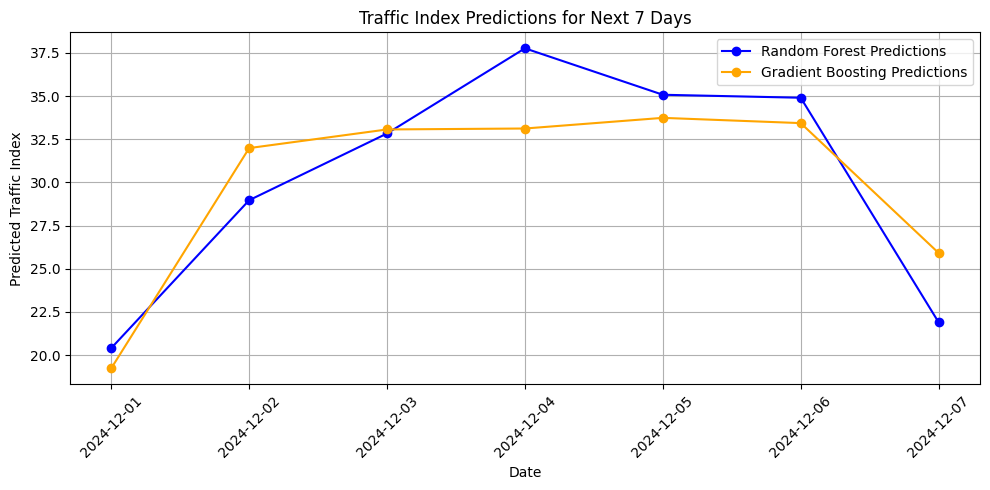

In [57]:
# Prepare to predict traffic indices for the next 7 days
predicted_dates = []
rf_predictions = []
gb_predictions = []

# Loop through the next 7 days
for i in range(7):
    future_date = pd.to_datetime("2024-12-01") + pd.Timedelta(days=i)
    future_data = pd.DataFrame({
        'date_only': [future_date],
        'day_of_week': [future_date.dayofweek],  # 0=Monday, 6=Sunday
        'day': [future_date.day],
        'month': [future_date.month]
    })

    # Predict using Random Forest
    rf_prediction = rf_model.predict(future_data[['day_of_week', 'day', 'month']])
    rf_predictions.append(rf_prediction[0])
    
    # Predict using Gradient Boosting
    gb_prediction = model.predict(future_data[['day_of_week', 'day', 'month']])
    gb_predictions.append(gb_prediction[0])
    
    # Store the date
    predicted_dates.append(future_date.date())

# Convert predictions to numpy arrays for plotting
rf_predictions = np.array(rf_predictions)
gb_predictions = np.array(gb_predictions)

# Plotting the predictions
plt.figure(figsize=(10, 5))
plt.plot(predicted_dates, rf_predictions, marker='o', label='Random Forest Predictions', color='blue')
plt.plot(predicted_dates, gb_predictions, marker='o', label='Gradient Boosting Predictions', color='orange')

# Adding titles and labels
plt.title('Traffic Index Predictions for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Traffic Index')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

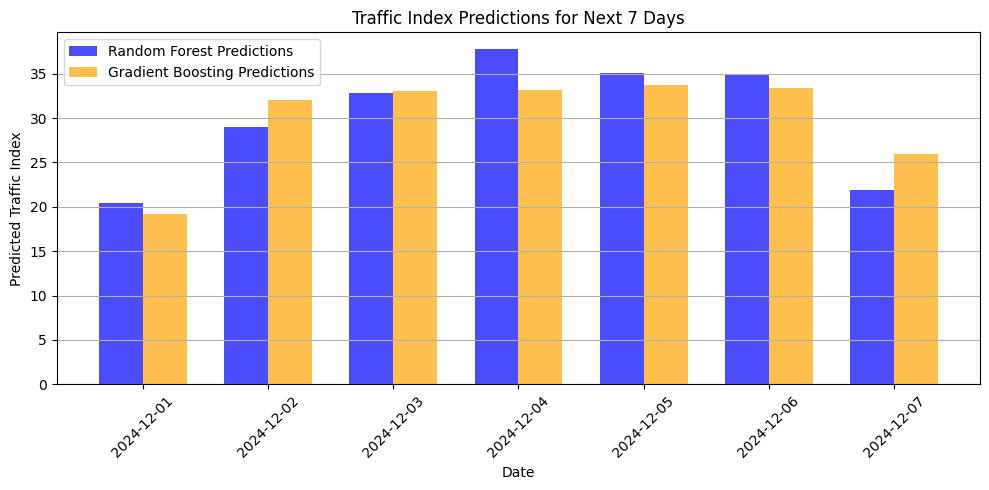

In [58]:
# Plotting the predictions as a bar plot
bar_width = 0.35  # width of the bars
x = np.arange(len(predicted_dates))  # the label locations

plt.figure(figsize=(10, 5))

# Bar plot for Random Forest Predictions
plt.bar(x - bar_width/2, rf_predictions, width=bar_width, label='Random Forest Predictions', color='blue', alpha=0.7)
# Bar plot for Gradient Boosting Predictions
plt.bar(x + bar_width/2, gb_predictions, width=bar_width, label='Gradient Boosting Predictions', color='orange', alpha=0.7)

# Adding titles and labels
plt.title('Traffic Index Predictions for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Traffic Index')
plt.xticks(x, predicted_dates, rotation=45)  # Set x-ticks to the predicted dates
plt.legend()
plt.grid(axis='y')  # Only grid on the y-axis
plt.tight_layout()

# Show the plot
plt.show()


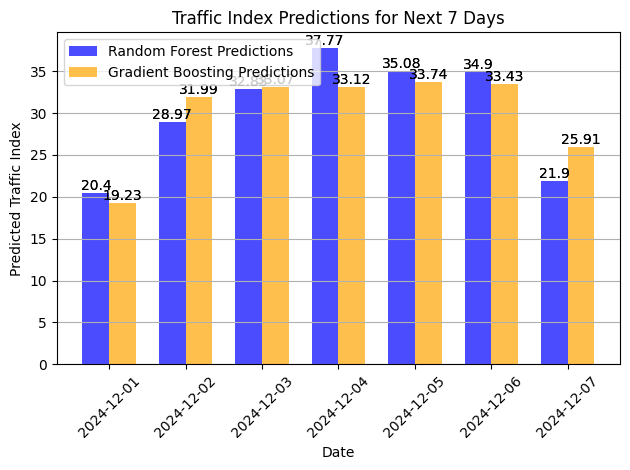

In [61]:
# Bar plot for Random Forest Predictions
rf_bars = plt.bar(x - bar_width/2, rf_predictions, width=bar_width, label='Random Forest Predictions', color='blue', alpha=0.7)
# Bar plot for Gradient Boosting Predictions
gb_bars = plt.bar(x + bar_width/2, gb_predictions, width=bar_width, label='Gradient Boosting Predictions', color='orange', alpha=0.7)

# Adding titles and labels
plt.title('Traffic Index Predictions for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Traffic Index')
plt.xticks(x, predicted_dates, rotation=45)  # Set x-ticks to the predicted dates
plt.legend()
plt.grid(axis='y')  # Only grid on the y-axis
plt.tight_layout()

# Adding labels on top of the bars
for bar in rf_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Add label on Random Forest bars

for bar in gb_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Add label on Gradient Boosting bars



# Adding labels on top of the bars
for bar in rf_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Add label on Random Forest bars

for bar in gb_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Add label on Gradient Boosting bars

# Show the plot
plt.show()